In [48]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist       import plots, MCSamples 
from   astropy.table import Table

In [49]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [50]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile

In [51]:
version = 'GAMA4'
survey  = 'gama'
dryrun  =  False

In [52]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold.fits'

In [53]:
gold = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0), ('GOLD_NGAL', 113687)])

##  VMAX

In [54]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
vmax  = Table.read(fpath)
vmax

MCOLOR_0P0,ZGAMA,ZMIN,FIELD,WEIGHT_STEPWISE,ZMAX,IN_D8LUMFN,VMAX,VZ
mag,,,,,,,,
float64,float32,float64,bytes3,float64,float64,int64,float64,float64
-18.604556713474466,0.12458,0.03903000056743622,G15,2.9154826542283168,0.16536951392988855,0,1989415.1173069389,856251.0919558892
-17.11399743017944,0.07201,0.03903000056743622,G12,1.6538945935980034,0.07941366026455443,0,206911.28313956544,147757.13652707596
-18.636691739639105,0.07826,0.03903000056743622,G9,1.8026043529105287,0.1420511737557886,0,1269160.6371459882,196949.02424263215
-21.502733726822058,0.15774,0.03903000056743622,G12,4.055363565159679,0.26298999786376953,0,7594841.612883208,1731165.271538042
-19.433183926472903,0.15464,0.03903000056743622,G9,4.055363565159679,0.19594298885874487,0,3264168.438401783,1632645.5786324611
-20.100998160222886,0.10636,0.03903000056743622,G12,2.641752036027377,0.25972323287594257,0,7330030.538789366,528161.9353389031
-20.67997312087086,0.21078,0.03903000056743622,G9,6.092189398390652,0.26298999786376953,0,7594841.612883208,4031555.38349436
-19.131149226207985,0.08423,0.03903000056743622,G12,1.989860106214467,0.2020584584880216,0,3568145.049230486,251613.6194825457


##  LUMFN

In [55]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
lumfn = Table.read(fpath)
lumfn

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


In [68]:
# TODO: incorporate into findfile

#stepwise  = Table.read('/cosma5/data/durham/dc-wils7/GAMA4/gama_gold_lumfn_step.fits')
stepwise   = Table.read('/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_lumfn_step.fits')

In [69]:
stepwise

Ms,PHI_STEP
float64,float64
-25.5,0.0
-25.3,0.0
-25.1,0.0
-24.900000000000002,0.0
-24.700000000000003,0.0
-24.500000000000004,0.0
-24.300000000000004,0.0
-24.100000000000005,0.0
-23.900000000000006,0.0


/tmp/ipykernel_2588/3436872867.py:5: RuntimeWarning: divide by zero encountered in log10
  pl.plot(stepwise['Ms'], np.log10(stepwise['PHI_STEP']), label='STEPWISE', lw=2)
/tmp/ipykernel_2588/3436872867.py:8: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_N']), lumfn['PHI_N_ERROR'] / lumfn['PHI_N'] / np.log(10.), label='RAW', alpha=0.4, lw=2)
/tmp/ipykernel_2588/3436872867.py:8: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_N']), lumfn['PHI_N_ERROR'] / lumfn['PHI_N'] / np.log(10.), label='RAW', alpha=0.4, lw=2)
/tmp/ipykernel_2588/3436872867.py:9: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(lumfn['MEDIAN_M'],  np.log10(lumfn['PHI_IVMAX']), lumfn['PHI_IVMAX_ERROR'] / lumfn['PHI_IVMAX'] / np.log(10.), label='IVMAX', lw=2)
/tmp/ipykernel_2588/3436872867.py:9: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(lumfn['MEDIAN_M'], 

Text(0.5, 1.0, 'GAMA')

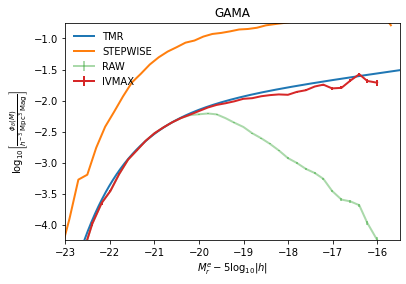

In [70]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=2)
pl.plot(stepwise['Ms'], np.log10(stepwise['PHI_STEP']), label='STEPWISE', lw=2)


pl.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_N']), lumfn['PHI_N_ERROR'] / lumfn['PHI_N'] / np.log(10.), label='RAW', alpha=0.4, lw=2)
pl.errorbar(lumfn['MEDIAN_M'],  np.log10(lumfn['PHI_IVMAX']), lumfn['PHI_IVMAX_ERROR'] / lumfn['PHI_IVMAX'] / np.log(10.), label='IVMAX', lw=2)

pl.xlabel(r'$M_r^e - 5 \log_{10}|h|$')
pl.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} \ {\rm Mpc}^{3} \ {\rm Mag}^{}} \right] $')

pl.ylim(-4.25, -.75)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

In [58]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
gold  = Table.read(fpath)
gold

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,mag,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,float64,float64,float64,float64,float64,float64,float32,float32
49666,587722982295273988,221.89800269,-0.6415381,19.241835,0.12458,4,G15_Y1_HS2_033,6,19.763887,19.138214,18.93341,18.772236,19.113127,0.12458,409.8743148290063,38.06325351842394,G15,0,-271.2698035537147,-243.37940556486063,-4.080854256126575,273.30030998287657,241.09224426149586,-4.354889763758178,0.20480347,19.241835
139025,587724650333077845,185.31240015,-1.71745883,19.589233,0.07201,3,G12_Y2_005_095,5,20.732338,19.895437,19.584732,19.327354,19.398808,0.07201,228.23871532041073,36.7919465707857,G12,0,-211.89751863006472,-19.70339365082965,-6.381005589922235,212.0490405347563,17.922830436436097,-6.593626673755219,0.31070518,19.589233
214264,587725075524682122,129.50683691,0.52589209,18.379673,0.07826,4,G09_Y1_test_116,6,21.10666,19.103128,18.255648,17.893887,17.584246,0.07826,249.18607796654842,36.98261887309769,G9,0,-147.0128822160159,178.2975350217959,2.12113451328627,145.51211007838148,-179.52610400322502,1.9752331235584817,0.8474808,18.379673
536269,588848898839543956,181.39347962,-0.85282612,17.191727,0.15774,5,322041491755132928,6,19.97562,18.241964,17.1869,16.784622,16.485594,0.15774,530.636077190221,38.62398386856322,G12,0,-458.15155993384866,-11.144813340761596,-6.821934742361414,458.2219394709942,7.296100659330028,-7.281389321955303,1.0550652,17.191727
418998,587728879259680951,138.42527661,2.73289256,19.210749,0.15464,4,G09_Y2_031_298,6,21.882418,20.103489,19.081709,18.549156,18.176828,0.15464,519.1491953902114,38.57646092626833,G9,0,-335.97407304578536,298.02679081242127,21.437830774361636,333.4802231857957,-300.8383466656785,21.103466744793728,1.02178,19.210749
54280,587722982812680385,177.47329606,-0.31725895,17.634909,0.10636,5,319842192682149888,6,19.65366,18.283745,17.539707,17.175686,16.829344,0.10636,345.5359225666571,37.69246602065664,G12,0,-312.00938903303575,13.768323044374418,-1.7293614973141267,311.88084194944713,-16.388611600815402,-2.0420798496929287,0.7440376,17.634909
377162,587727943491256566,136.65750354,1.55698374,18.749691,0.21078,4,G09_Y1_FN2_374,6,21.79226,20.003727,18.744532,18.27386,18.025156,0.21078,733.2949454247376,39.32639345714967,G9,0,-440.2963571027586,415.53130054247623,16.455892305458278,436.806781247178,-419.2149833084115,16.017922033113244,1.2591953,18.749691
40016,587722982276661360,179.32108875,-0.7282803,17.932632,0.08423,4,G12_Y1_DS2_343,6,19.457369,18.422329,17.913288,17.519955,17.36411,0.08423,269.36025131515987,37.15166754290135,G12,0,-248.39710875856295,2.943453881959531,-3.1577398347411334,248.36033076963108,-5.029802486538083,-3.4067679959696218,0.50904083,17.932632


##  Cobaya

In [59]:
# root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [60]:
# dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [61]:
# samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [62]:
# samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [63]:
# tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [64]:
# g = plots.get_subplot_plotter()

In [65]:
# g.triangle_plot([samples], filled=True)        

# Done.